In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Building the model 

In [29]:
from tensorflow.keras import Sequential
model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,'relu'),
    Dense(1,'sigmoid')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)      

In [31]:
optimizer=tf.keras.optimizers.Adam(0.01)
loss='binary_crossentropy'
accuracy='accuracy'

In [32]:
model.compile(optimizer=optimizer,loss=loss,metrics=[accuracy])

In [33]:
train_data=ImageDataGenerator(rescale=(1/255))

In [34]:
train=os.path.join("C:/Users/Paa Kwasi/Desktop/Learning TensorFlow and Keras for DeepLearning/horse-or-human/horse-or-human/horse-or-human/train")

In [35]:
train

'C:/Users/Paa Kwasi/Desktop/Learning TensorFlow and Keras for DeepLearning/horse-or-human/horse-or-human/horse-or-human/train'

In [36]:
train_datagen=train_data.flow_from_directory(
    train,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [37]:
model.fit(train_datagen, epochs=30)

Epoch 1/30
33/33 [==============================] - 57s 2s/step - loss: 1.3853 - accuracy: 0.4985
Epoch 2/30
33/33 [==============================] - 59s 2s/step - loss: 0.6936 - accuracy: 0.5073
Epoch 3/30
33/33 [==============================] - 59s 2s/step - loss: 0.6933 - accuracy: 0.5131
Epoch 4/30
33/33 [==============================] - 60s 2s/step - loss: 0.6940 - accuracy: 0.5131
Epoch 5/30
33/33 [==============================] - 60s 2s/step - loss: 0.6930 - accuracy: 0.5131
Epoch 6/30
33/33 [==============================] - 59s 2s/step - loss: 0.6932 - accuracy: 0.5131
Epoch 7/30
33/33 [==============================] - 59s 2s/step - loss: 0.6930 - accuracy: 0.5131
Epoch 8/30
33/33 [==============================] - 59s 2s/step - loss: 0.6930 - accuracy: 0.5131
Epoch 9/30
33/33 [==============================] - 59s 2s/step - loss: 0.6934 - accuracy: 0.5131
Epoch 10/30
33/33 [==============================] - 69s 2s/step - loss: 0.6930 - accuracy: 0.5131
Epoch 11/30
33/33 [

TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(None, 298, 298, 16), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.

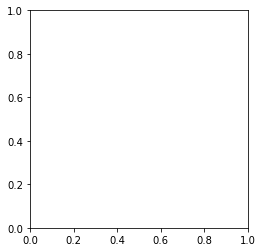

In [42]:
plt.imshow(model.layers[0].output)

In [52]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [46]:
from PIL import Image

In [50]:
successive_outputs=[layer.output for layer in model.layers]

In [51]:
successive_outputs

[<KerasTensor: shape=(None, 298, 298, 16) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 149, 149, 16) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 147, 147, 32) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 73, 73, 32) dtype=float32 (created by layer 'max_pooling2d_5')>,
 <KerasTensor: shape=(None, 71, 71, 64) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 35, 35, 64) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 33, 33, 64) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d_7')>,
 <KerasTensor: shape=(None, 16384) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>]

In [53]:
visual=tf.keras.models.Model(inputs=model.input,outputs=successive_outputs)

In [72]:
image=load_img("C:/Users/Paa Kwasi/Desktop/Learning TensorFlow and Keras for DeepLearning/horse-or-human/horse-or-human/horse-or-human/train/humans/human01-00.png",target_size=(300,300))

In [73]:
x/=255

In [74]:
x=img_to_array(image)

In [75]:
x=x.reshape((1,)+x.shape)

In [76]:
x.shape

(1, 300, 300, 3)

In [80]:
feature=visual.predict(x)

1/1 [==============================] - 0s 422ms/step


In [88]:
layer_name=[layer.name for layer in model.layers[1:]]

In [89]:
layer_name

['max_pooling2d_4',
 'conv2d_5',
 'max_pooling2d_5',
 'conv2d_6',
 'max_pooling2d_6',
 'conv2d_7',
 'max_pooling2d_7',
 'flatten_1',
 'dense_2',
 'dense_3']

Visualizing the intermediate layers

The code starts with defining a loop to iterate over a list of layer names and their corresponding feature maps.
The if statement checks if the current feature map has 4 dimensions, indicating that it is from a convolutional layer.
The number of features in the current feature map is determined by taking the last dimension of the shape of the feature map.
The size of the feature map is determined by taking the second dimension of the shape of the feature map.
A display grid is created with all elements initialized to zero with the size equal to the feature map size and number of features multiplied by the feature map size.
The loop iterates over each feature in the feature map, and for each feature:
The feature is normalized by subtracting its mean and dividing by its standard deviation.
The feature is scaled by multiplying it with 64 and adding 128.
The feature is clipped to a range between 0 and 255, and its data type is changed to unsigned integer (uint8).
The feature is added to the corresponding location in the display grid.
A scale factor is calculated based on the number of features, which is used to set the size of the plot.
A plot is created with the layer name as the title, the display grid as the image data, and the viridis colormap is used for color mapping.
The plot is displayed.
Each step in the code is important for the following reasons:

The loop is necessary to iterate over each layer and its feature map.
The if statement is important to check if the current feature map is from a convolutional layer to avoid errors when the code tries to apply normalization and scaling to non-convolutional feature maps.
Determining the number of features and the size of the feature map is important to create a display grid with the appropriate dimensions.
Initializing the display grid with zeros is necessary to ensure that each feature's visualization is separate and not mixed up with other features.
The display grid is used to store the visualizations of each feature in the feature map, arranged in a grid format for easy visualization.
Normalization, scaling, and clipping are essential for enhancing the visual quality of the feature map and avoiding numerical instability.
The scale factor is necessary to set the size of the plot so that the visualization of the feature map is clear and easy to interpret.
Creating a plot with the layer name as the title and the display grid as the image data is necessary to visualize the feature map.
Displaying the plot is necessary to allow the user to see the visualization of the feature map.

I might spend some time on working on how to view intermediate layer

C:\Users\Paa Kwasi\AppData\Local\Temp\ipykernel_18632\3579077267.py:9: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


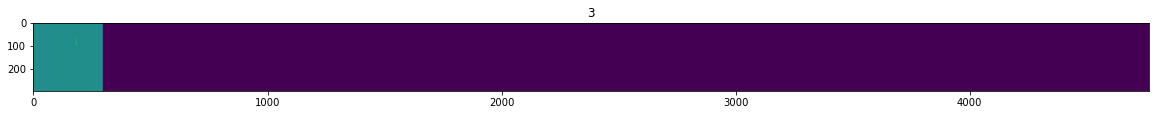

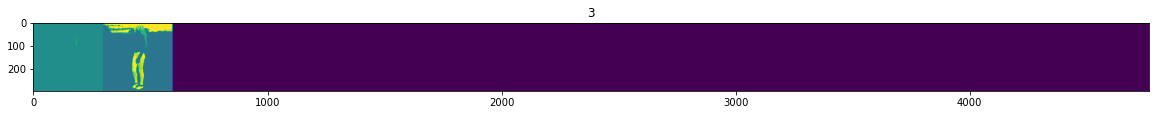

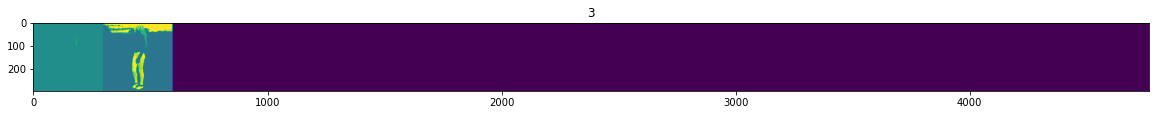

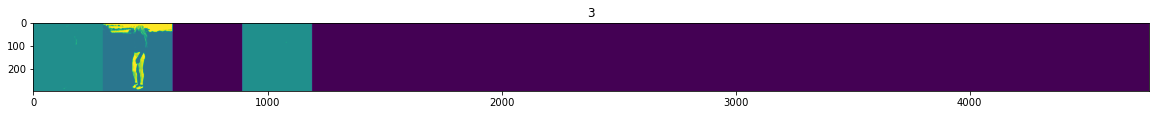

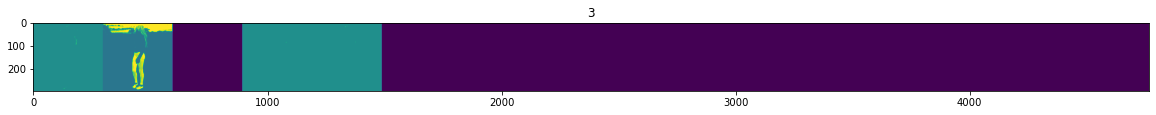

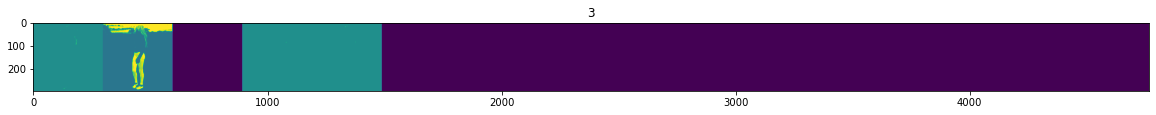

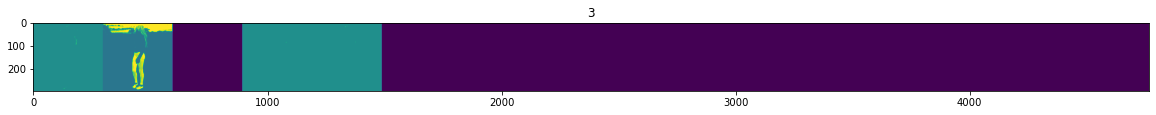

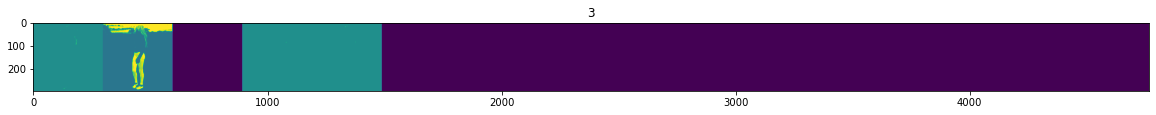

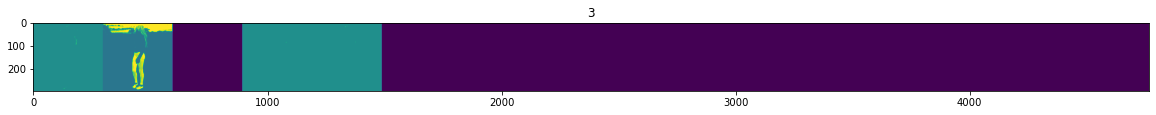

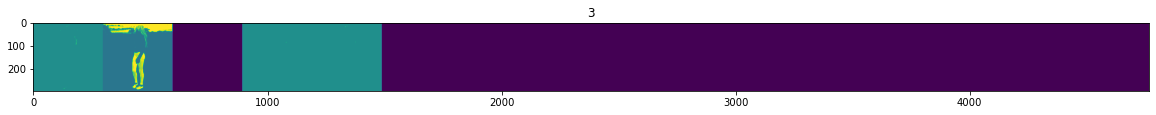

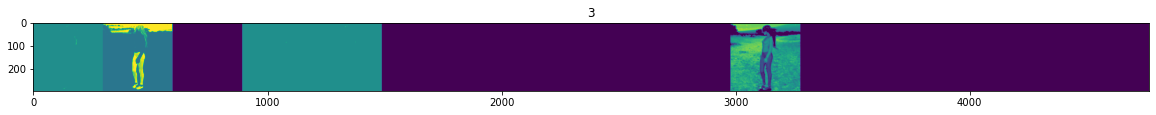

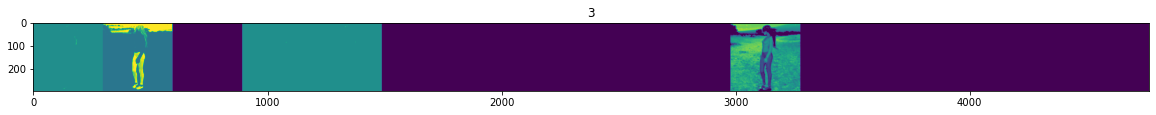

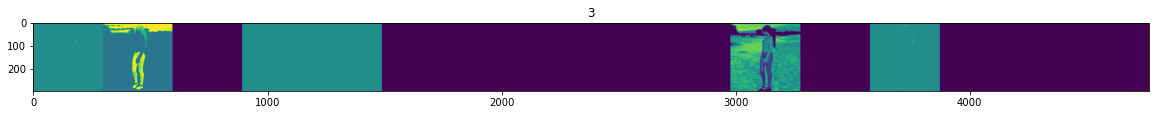

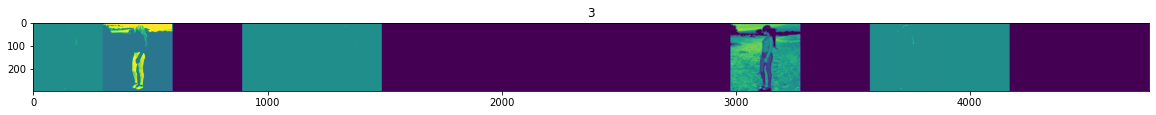

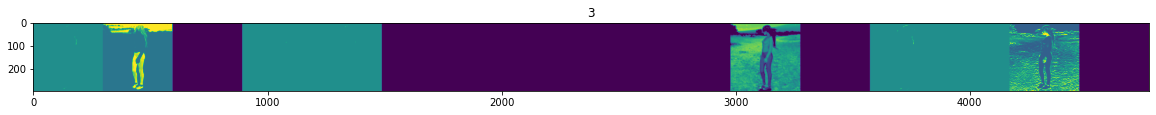

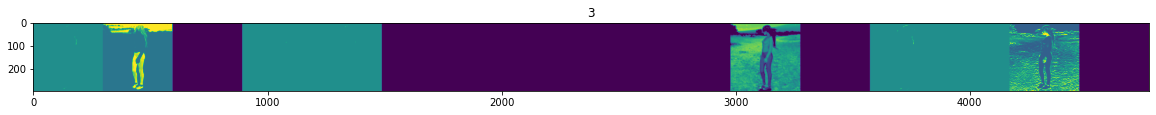

In [97]:
for layer_name, feature_map in zip(layer_name,feature):
    if len(feature_map.shape)==4:
        n_features=feature_map.shape[-1]
        size= feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

The reason for my low accuracy is due to the result of me training on my local cpu. I have an i3 hp laptop and I guess it was not enough.